In [151]:
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
abalone = fetch_ucirepo(id=1)

# Data (as pandas DataFrames)
data_X = abalone.data.features
data_y = abalone.data.targets


In [152]:
# Display the first few rows of the features and targets
print("Features (first few rows):")
data_X.head()

Features (first few rows):


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [153]:
print("\nTargets (first few rows):")
data_y.head()


Targets (first few rows):


,Rings
0,15
1,7
2,9
3,10
4,7


In [154]:
data_X.count()

Sex               4177
Length            4177
Diameter          4177
Height            4177
Whole_weight      4177
Shucked_weight    4177
Viscera_weight    4177
Shell_weight      4177
dtype: int64

In [155]:
data_y.count()

Rings    4177
dtype: int64

In [156]:
print('This is data X', data_X.shape)

This is data X (4177, 8)


In [157]:
print('This is data Y', data_y.shape)

This is data Y (4177, 1)


In [158]:
# Create a new target variable 'age' by adding 1.5 to 'Rings'
age_df = data_y + 1.5

# Add it back to your dataset if you need to include it in a new DataFrame
abalone['age'] = age_df

age_df.head()


,Rings
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5


In [159]:
data_X.dtypes.value_counts()



float64    7
object     1
Name: count, dtype: int64

In [160]:
data_X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [161]:
import pandas as pd

#encoding data_X
data_X_encoded = pd.get_dummies(data_X, columns=['Sex'], prefix='Sex')

data_X_encoded.head()


,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,True,False


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_X_encoded, age_df, test_size=0.25, random_state=42)




In [163]:
#Linear Regression model
model = LinearRegression()

# Training
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [164]:
#evaluating model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 4.674675841993122
Root Mean Squared Error: 2.162099868644629


In [165]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model again using scaled data
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)

print(f"Mean Squared Error (Scaled): {mse_scaled}")
print(f"Root Mean Squared Error (Scaled): {rmse_scaled}")


Mean Squared Error (Scaled): 4.676725240496621
Root Mean Squared Error (Scaled): 2.1625737537704053


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


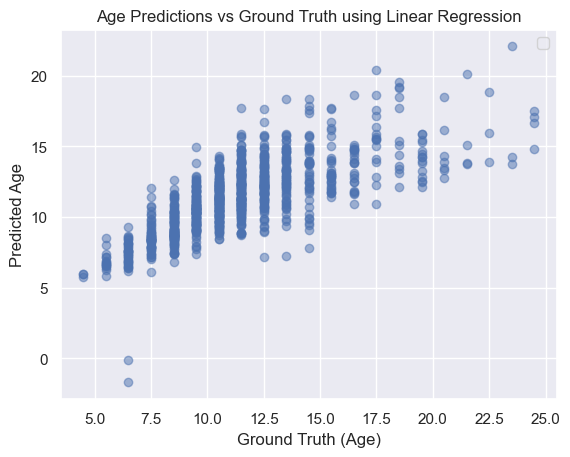

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure seaborn and matplotlib for better visualizations
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.set_palette('deep')

# Create the scatter plot
ax = plt.axes()
ax.scatter(y_test, y_pred_scaled, alpha=0.5)

# Set labels and title
ax.set(
    xlabel='Ground Truth (Age)',
    ylabel='Predicted Age',
    title='Age Predictions vs Ground Truth using Linear Regression'
)

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [167]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred_scaled)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Percentage Error (MAPE): 13.59%


In [168]:
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 86.41%
